In [1]:
import pandas as pd

In [2]:
installs=pd.read_csv('app_installs_processed.csv')
installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16999 entries, 0 to 16998
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   username     16999 non-null  object
 1   register_ts  16999 non-null  object
 2   device_os    16999 non-null  object
 3   lang         16999 non-null  object
 4   country      16999 non-null  object
 5   day_reg      16999 non-null  object
dtypes: object(6)
memory usage: 797.0+ KB


In [3]:
#change format
installs['day_reg'] = pd.to_datetime(installs['day_reg'])

In [4]:
# drop duplicates
installs = installs.drop_duplicates(subset=['username'],keep=False)

In [5]:
# drop unwanted columns
installs.drop(['register_ts', 'device_os'], axis= 1 , inplace= True ) 

In [6]:
installs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15777 entries, 0 to 16998
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   username  15777 non-null  object        
 1   lang      15777 non-null  object        
 2   country   15777 non-null  object        
 3   day_reg   15777 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 616.3+ KB


In [7]:
maxValues = installs.max(skipna=False)
maxValues

username                 zyoder
lang                      lang2
country                country3
day_reg     2023-06-24 00:00:00
dtype: object

In [8]:
minValues = installs.min(skipna=False)
minValues

username                aabbott
lang                      lang1
country                country1
day_reg     2022-03-25 00:00:00
dtype: object

#  # TASK 2

In [9]:
# number users by countries
installs.groupby(['country']).count()


,username,lang,day_reg
country,,,
country1,1698,1698,1698
country2,9841,9841,9841
country3,4238,4238,4238


In [10]:
# country 2 loc
lang=installs.loc[(installs['country']=='country2')]
lang.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 0 to 16998
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   username  9841 non-null   object        
 1   lang      9841 non-null   object        
 2   country   9841 non-null   object        
 3   day_reg   9841 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 384.4+ KB


In [11]:
# coutry 2 users counts
lang.groupby(['lang']).count()

,username,country,day_reg
lang,,,
lang1,3403,3403,3403
lang2,6438,6438,6438


In [12]:
# lock by dates for retention
lang_common = lang.loc[(lang['day_reg']<='2023-05-27')]
lang_common.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9349 entries, 0 to 16998
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   username  9349 non-null   object        
 1   lang      9349 non-null   object        
 2   country   9349 non-null   object        
 3   day_reg   9349 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 365.2+ KB


In [13]:
# lock by dates for LTV
lang_common1 = lang.loc[(lang['day_reg']<='2022-12-27')]
lang_common1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6704 entries, 0 to 16998
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   username  6704 non-null   object        
 1   lang      6704 non-null   object        
 2   country   6704 non-null   object        
 3   day_reg   6704 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 261.9+ KB


# TASK5

In [14]:
# users  numbers for  LTV
lang_common1['lang'].value_counts()

lang1    3403
lang2    3301
Name: lang, dtype: int64

# TASK 3

In [15]:
lang_common['lang'].value_counts()

lang2    5946
lang1    3403
Name: lang, dtype: int64

In [16]:
logins=pd.read_csv('logins_processed.csv')
logins

,username,login_dt,login_ts,logout_ts
0,richarddavid,2022-06-22 00:00:00,2022-06-22 06:00:28,2022-06-22 06:04:33
1,richarddavid,2022-04-05 00:00:00,2022-04-05 19:12:24,2022-04-05 20:14:19
2,richarddavid,2022-04-05 00:00:00,2022-04-05 18:38:36,2022-04-05 18:43:15
3,richarddavid,2022-04-05 00:00:00,2022-04-05 04:27:37,2022-04-05 04:31:33
4,richarddavid,2022-06-14 00:00:00,2022-06-14 18:01:18,2022-06-14 19:37:17
...,...,...,...,...
1031792,brandonfarmer,2022-10-24 00:00:00,2022-10-24 14:09:57,2022-10-24 17:09:06
1031793,jason00,2023-05-28 00:00:00,2023-05-28 12:20:40,2023-05-28 12:20:44
1031794,bhess,2023-03-26 00:00:00,2023-03-26 21:29:57,2023-03-26 23:40:36
1031795,timothy26,2022-10-28 00:00:00,2022-10-28 18:40:20,2022-10-28 19:20:25


In [17]:
# count duplicates
len(logins)- len(logins.drop_duplicates ())

70289

In [18]:
# drop duplicates
logins.drop_duplicates (inplace=True)

In [19]:
# drop unwanted columns
logins.drop(['login_ts', 'logout_ts'], axis= 1 , inplace= True ) 

In [20]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961508 entries, 0 to 1031796
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   username  961508 non-null  object
 1   login_dt  961001 non-null  object
dtypes: object(2)
memory usage: 22.0+ MB


In [21]:
# format change
logins['login_dt'] = pd.to_datetime(logins['login_dt'])

In [22]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961508 entries, 0 to 1031796
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   username  961508 non-null  object        
 1   login_dt  961001 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 22.0+ MB


In [23]:

# Объединение датафреймов
joined_df = lang_common.merge(logins, on='username')

In [24]:
joined_df['username'].nunique()

9349

In [25]:
joined_df['login_dt'] = joined_df['login_dt'].fillna(joined_df['day_reg'])

# Проверка на наличие пустых значений
print(joined_df['login_dt'].isnull().sum())

0


In [26]:
maxValues = joined_df.max(skipna=False)
maxValues

username                zwright
lang                      lang2
country                country2
day_reg     2023-05-27 00:00:00
login_dt    2023-06-26 00:00:00
dtype: object

In [27]:
joined_df1 = joined_df[(joined_df['day_reg'] >= '2022-03-25') & (joined_df['day_reg'] <= '2023-05-27')]


In [28]:
joined_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591472 entries, 0 to 591471
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   username  591472 non-null  object        
 1   lang      591472 non-null  object        
 2   country   591472 non-null  object        
 3   day_reg   591472 non-null  datetime64[ns]
 4   login_dt  591472 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 27.1+ MB


In [29]:
l1=joined_df[joined_df['lang']=='lang1']

l1['username'].nunique()

3403

In [30]:
l2=joined_df[joined_df['lang']=='lang2']

l2['username'].nunique()

5946

In [31]:
# Рассчитываем разницу в днях между днем регистрации и первым входом для каждого пользователя
joined_df1['days_between_reg_and_login'] = (joined_df1['login_dt'] - joined_df1['day_reg']).dt.days


In [32]:
joined_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591472 entries, 0 to 591471
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   username                    591472 non-null  object        
 1   lang                        591472 non-null  object        
 2   country                     591472 non-null  object        
 3   day_reg                     591472 non-null  datetime64[ns]
 4   login_dt                    591472 non-null  datetime64[ns]
 5   days_between_reg_and_login  591472 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 31.6+ MB


In [33]:
joined_df1['days_between_reg_and_login'].max()

457

In [34]:
filtered = joined_df1[joined_df1['days_between_reg_and_login'] <=30]
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202853 entries, 1 to 591471
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   username                    202853 non-null  object        
 1   lang                        202853 non-null  object        
 2   country                     202853 non-null  object        
 3   day_reg                     202853 non-null  datetime64[ns]
 4   login_dt                    202853 non-null  datetime64[ns]
 5   days_between_reg_and_login  202853 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 10.8+ MB


In [35]:
filtered['username'].nunique()

9198

In [36]:
# Разделите пользователей на группы
lang1 = filtered[filtered["lang"] == "lang1"]
lang2 = filtered[filtered["lang"] == "lang2"]

In [37]:
lang1['username'].nunique()

3326

In [38]:
lang2['username'].nunique()

5872

In [39]:
lang1.groupby(['days_between_reg_and_login'])['username'].nunique() / lang1['username'].nunique()


days_between_reg_and_login
0     0.929345
1     0.504510
2     0.390559
3     0.326218
4     0.289236
5     0.259771
6     0.252255
7     0.236320
8     0.218280
9     0.205051
10    0.186109
11    0.182802
12    0.171377
13    0.172279
14    0.166566
15    0.158749
16    0.154239
17    0.150331
18    0.146121
19    0.148527
20    0.144919
21    0.146422
22    0.141311
23    0.137102
24    0.133193
25    0.128082
26    0.129284
27    0.125075
28    0.123873
29    0.120265
30    0.119062
Name: username, dtype: float64

In [40]:
ret=lang1.groupby(['days_between_reg_and_login'])['username'].nunique() / lang1['username'].nunique()
ret.reset_index(drop= True , inplace= True )

ret.sum()


6.697233914612146

In [41]:
whole_retention1 = lang1.groupby(['days_between_reg_and_login'])['username'].nunique() / lang1['username'].nunique()


In [42]:
lang2.groupby(['days_between_reg_and_login'])['username'].nunique() / lang2['username'].nunique()

days_between_reg_and_login
0     0.935116
1     0.700272
2     0.435456
3     0.358651
4     0.311819
5     0.285763
6     0.267881
7     0.253917
8     0.237398
9     0.219346
10    0.212193
11    0.199251
12    0.192439
13    0.189884
14    0.185967
15    0.178304
16    0.174387
17    0.171151
18    0.165702
19    0.157868
20    0.158379
21    0.158719
22    0.150886
23    0.150715
24    0.149864
25    0.144925
26    0.139816
27    0.135559
28    0.135048
29    0.136410
30    0.129939
Name: username, dtype: float64

# TASK 3

In [43]:
ret2=lang2.groupby(['days_between_reg_and_login'])['username'].nunique() / lang2['username'].nunique()
ret2.reset_index(drop= True , inplace= True )
print('square lang1', ret.sum())
print('square lang1', ret2.sum())

square lang1 6.697233914612146
square lang1 7.4230245231607626


In [44]:
whole_retention2 = lang2.groupby(['days_between_reg_and_login'])['username'].nunique() / lang2['username'].nunique()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

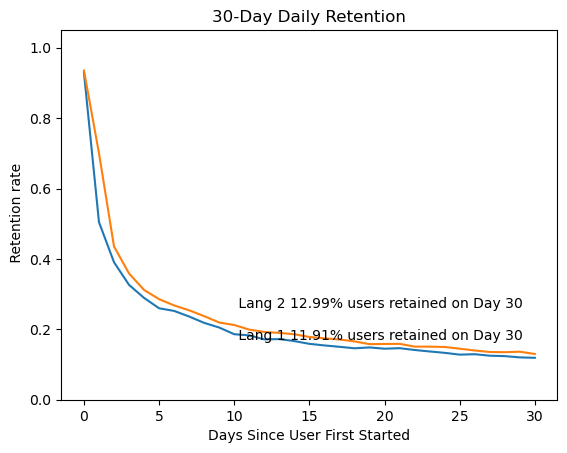

In [157]:
plt.plot(whole_retention1)
plt.plot(whole_retention2)
plt.title("30-Day Daily Retention")
plt.xlabel("Days Since User First Started")
plt.ylabel(" Retention rate")
plt.ylim(0,1.05)

#plt.hlines(y=whole_retention1.loc[30], xmin=0, xmax=30, linestyles='dotted')
#plt.vlines(x=20, ymin=0, ymax=whole_retention2.loc[30], linestyles='dotted')
plt.text(s=(" Lang 1 {:.2%} users retained on Day 30".format(whole_retention1.loc[30])),
      x=10, y=whole_retention1.loc[30] + .05);
plt.text(s=(" Lang 2 {:.2%} users retained on Day 30".format(whole_retention2.loc[30])),
       x=10, y=whole_retention2.loc[10] + .05);

In [46]:
payments=pd.read_csv('payments_processed.csv')
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19483 entries, 0 to 19482
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   username       19483 non-null  object 
 1   pay_dt         19483 non-null  object 
 2   pay_time_dttm  19483 non-null  object 
 3   pay_amt        19483 non-null  float64
 4   currency       19483 non-null  object 
dtypes: float64(1), object(4)
memory usage: 761.2+ KB


In [47]:
maxValues = payments.max(skipna=False)
maxValues

username                     zwright
pay_dt                    2023-06-25
pay_time_dttm    2023-06-25 23:47:48
pay_amt                      14999.0
currency                         usd
dtype: object

In [48]:
minValues = payments.min(skipna=False)
minValues

username                     aabbott
pay_dt                    2022-03-26
pay_time_dttm    2022-03-26 18:02:14
pay_amt                       0.0088
currency                         rub
dtype: object

In [49]:
payments

,username,pay_dt,pay_time_dttm,pay_amt,currency
0,richarddavid,2022-03-27,2022-03-27 16:54:20,1.7537,usd
1,richarddavid,2022-03-27,2022-03-27 16:27:28,0.1622,usd
2,richarddavid,2022-03-26,2022-03-26 21:38:06,1.7573,usd
3,josephromero,2023-06-09,2023-06-09 11:39:09,1.6040,usd
4,josephromero,2023-06-09,2023-06-09 11:45:54,1.6040,usd
...,...,...,...,...,...
19478,ubrooks,2023-03-13,2023-03-13 06:57:27,25.0000,rub
19479,ubrooks,2022-11-19,2022-11-19 13:32:56,340.0000,rub
19480,ericasmith,2022-10-26,2022-10-26 22:04:59,100.0000,rub
19481,ericasmith,2023-03-16,2023-03-16 12:30:16,150.0000,rub


In [50]:
payments.drop(['pay_time_dttm'], axis= 1 , inplace= True ) 

In [51]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19483 entries, 0 to 19482
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   username  19483 non-null  object 
 1   pay_dt    19483 non-null  object 
 2   pay_amt   19483 non-null  float64
 3   currency  19483 non-null  object 
dtypes: float64(1), object(3)
memory usage: 609.0+ KB


In [52]:
payments['currency'].unique()

array(['usd', 'rub'], dtype=object)

In [53]:
rates=pd.read_excel('cbr_rates.xlsx')
rates

,date,valute,numcode,charcode,nominal,name,value,rate_dt
0,2022-10-14 00:00:00,R01239,978,EUR,1,Евро,62.5903,2022-10-14
1,2022-10-14 00:00:00,R01235,840,USD,1,Доллар США,63.4917,2022-10-14
2,2023-03-11 00:00:00,R01239,978,EUR,1,Евро,80.4009,2023-03-11
3,2023-03-11 00:00:00,R01235,840,USD,1,Доллар США,75.9406,2023-03-11
4,2022-11-19 00:00:00,R01239,978,EUR,1,Евро,62.4484,2022-11-19
...,...,...,...,...,...,...,...,...
911,2022-09-13 00:00:00,R01235,840,USD,1,Доллар США,60.4568,2022-09-13
912,2023-01-21 00:00:00,R01239,978,EUR,1,Евро,74.3434,2023-01-22
913,2023-01-21 00:00:00,R01235,840,USD,1,Доллар США,68.6656,2023-01-22
914,2023-04-15 00:00:00,R01239,978,EUR,1,Евро,90.1637,2023-04-17


In [54]:
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      916 non-null    object 
 1   valute    916 non-null    object 
 2   numcode   916 non-null    int64  
 3   charcode  916 non-null    object 
 4   nominal   916 non-null    int64  
 5   name      916 non-null    object 
 6   value     916 non-null    float64
 7   rate_dt   916 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 57.4+ KB


In [55]:
rates.drop(['date','valute','numcode', 'charcode','nominal'], axis= 1 , inplace= True ) 

In [56]:
rates

,name,value,rate_dt
0,Евро,62.5903,2022-10-14
1,Доллар США,63.4917,2022-10-14
2,Евро,80.4009,2023-03-11
3,Доллар США,75.9406,2023-03-11
4,Евро,62.4484,2022-11-19
...,...,...,...
911,Доллар США,60.4568,2022-09-13
912,Евро,74.3434,2023-01-22
913,Доллар США,68.6656,2023-01-22
914,Евро,90.1637,2023-04-17


In [57]:
rates=rates[rates['name']=='Доллар США']

In [58]:
rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 1 to 915
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     458 non-null    object 
 1   value    458 non-null    float64
 2   rate_dt  458 non-null    object 
dtypes: float64(1), object(2)
memory usage: 14.3+ KB


In [59]:
rates['name'].unique()

array(['Доллар США'], dtype=object)

In [60]:
rates.rename(columns = {'name':'currency','rate_dt':'pay_dt' }, inplace = True )

C:\Users\Professional\AppData\Local\Temp\ipykernel_4696\1841798742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rates.rename(columns = {'name':'currency','rate_dt':'pay_dt' }, inplace = True )


In [61]:
rates['currency'] = rates['currency']. replace ('Доллар США', 'usd')

C:\Users\Professional\AppData\Local\Temp\ipykernel_4696\2972365783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rates['currency'] = rates['currency']. replace ('Доллар США', 'usd')


In [62]:
rates

,currency,value,pay_dt
1,usd,63.4917,2022-10-14
3,usd,75.9406,2023-03-11
5,usd,60.3741,2022-11-19
7,usd,61.0611,2022-11-10
9,usd,57.3917,2022-07-23
...,...,...,...
907,usd,62.0955,2022-11-05
909,usd,69.0202,2023-01-12
911,usd,60.4568,2022-09-13
913,usd,68.6656,2023-01-22


In [63]:
payments['username'].nunique()

3513

In [64]:
roubles = pd.merge(payments, rates, how='left', on=['currency', 'pay_dt'])

# Расчет суммы в рублях
roubles['pay_rub'] = roubles['pay_amt'] * roubles['value']

# Обработка пропусков
#roubles['pay_amt'].fillna(0, inplace=True)

# Обработка рублёвых платежей
roubles.loc[roubles['currency'] == 'RUB', 'pay_rub'] = roubles['pay_amt']

# Сортировка
roubles = roubles.sort_values(by=['username', 'pay_dt'])

# Вывод результата
#print(df_merged.to_string())

In [65]:
roubles

,username,pay_dt,pay_amt,currency,value,pay_rub
12291,aabbott,2023-05-19,1.2916,usd,80.0366,103.375273
1914,aaron15,2023-05-21,63.7800,rub,NaN,NaN
15288,aaron54,2022-09-02,25.0000,rub,NaN,NaN
2837,aaronbishop,2022-05-11,2.6262,usd,67.3843,176.964649
2804,aaronbishop,2022-05-26,1.7619,usd,56.2996,99.194265
...,...,...,...,...,...,...
19297,zwilliams,2022-12-22,0.8574,usd,70.5256,60.468649
5611,zwilliams,2023-01-06,0.8681,usd,70.3375,61.059984
19294,zwilliams,2023-01-06,0.8681,usd,70.3375,61.059984
19065,zwilson,2022-06-07,279.0000,rub,NaN,NaN


In [66]:
roubles['pay_rub'].fillna(roubles['pay_amt'], inplace=True)

In [67]:
roubles

,username,pay_dt,pay_amt,currency,value,pay_rub
12291,aabbott,2023-05-19,1.2916,usd,80.0366,103.375273
1914,aaron15,2023-05-21,63.7800,rub,NaN,63.780000
15288,aaron54,2022-09-02,25.0000,rub,NaN,25.000000
2837,aaronbishop,2022-05-11,2.6262,usd,67.3843,176.964649
2804,aaronbishop,2022-05-26,1.7619,usd,56.2996,99.194265
...,...,...,...,...,...,...
19297,zwilliams,2022-12-22,0.8574,usd,70.5256,60.468649
5611,zwilliams,2023-01-06,0.8681,usd,70.3375,61.059984
19294,zwilliams,2023-01-06,0.8681,usd,70.3375,61.059984
19065,zwilson,2022-06-07,279.0000,rub,NaN,279.000000


In [68]:
roubles.drop(['pay_amt','currency','value'], axis= 1 , inplace= True ) 

In [69]:
roubles

,username,pay_dt,pay_rub
12291,aabbott,2023-05-19,103.375273
1914,aaron15,2023-05-21,63.780000
15288,aaron54,2022-09-02,25.000000
2837,aaronbishop,2022-05-11,176.964649
2804,aaronbishop,2022-05-26,99.194265
...,...,...,...
19297,zwilliams,2022-12-22,60.468649
5611,zwilliams,2023-01-06,61.059984
19294,zwilliams,2023-01-06,61.059984
19065,zwilson,2022-06-07,279.000000


In [70]:
roubles['username'].nunique()

3513

In [71]:
roubles['pay_rub'].sum() 

11162631.42142223

In [72]:
lang_common1.groupby(['lang']).count()

,username,country,day_reg
lang,,,
lang1,3403,3403,3403
lang2,3301,3301,3301


In [73]:
lang_common1

,username,lang,country,day_reg
0,richarddavid,lang1,country2,2022-03-26
1,josephromero,lang1,country2,2022-05-11
2,erica34,lang1,country2,2022-06-11
8,jennifer05,lang2,country2,2022-09-28
9,sheila90,lang1,country2,2022-06-18
...,...,...,...,...
16987,camposnatasha,lang1,country2,2022-05-24
16989,barbara06,lang1,country2,2022-07-05
16990,wguerra,lang1,country2,2022-03-28
16997,deborahhaley,lang1,country2,2022-04-17


In [74]:
l22=len(lang_common1[lang_common1['lang']=='lang2'])
l22

3301

In [75]:
merged_data2 = pd.merge(lang_common1, roubles, on='username', how='inner')
merged_data2

,username,lang,country,day_reg,pay_dt,pay_rub
0,richarddavid,lang1,country2,2022-03-26,2022-03-26,168.106481
1,richarddavid,lang1,country2,2022-03-26,2022-03-27,167.762099
2,richarddavid,lang1,country2,2022-03-26,2022-03-27,15.516344
3,josephromero,lang1,country2,2022-05-11,2023-03-19,332.761853
4,josephromero,lang1,country2,2022-05-11,2023-03-20,491.195073
...,...,...,...,...,...,...
8844,belldakota,lang1,country2,2022-05-10,2022-05-11,2949.444503
8845,belldakota,lang1,country2,2022-05-10,2022-05-11,589.888901
8846,jesse55,lang2,country2,2022-11-26,2023-02-08,122.913243
8847,alexis55,lang2,country2,2022-10-06,2023-06-03,1300.139970


In [76]:
merged_data2['pay_dt'] = pd.to_datetime(merged_data2['pay_dt'])

In [77]:
merged_data2['days_diff'] = (merged_data2['pay_dt'] - merged_data2['day_reg']).dt.days

In [78]:
merged_data2.groupby(['lang']).count()

,username,country,day_reg,pay_dt,pay_rub,days_diff
lang,,,,,,
lang1,5169,5169,5169,5169,5169,5169
lang2,3680,3680,3680,3680,3680,3680


In [79]:
merged_data_filtered = merged_data2[ (merged_data2['days_diff']>=0) &(merged_data2['days_diff']<=180)]
merged_data_filtered

,username,lang,country,day_reg,pay_dt,pay_rub,days_diff
0,richarddavid,lang1,country2,2022-03-26,2022-03-26,168.106481,0
1,richarddavid,lang1,country2,2022-03-26,2022-03-27,167.762099,1
2,richarddavid,lang1,country2,2022-03-26,2022-03-27,15.516344,1
15,erica34,lang1,country2,2022-06-11,2022-06-29,627.544999,18
16,erica34,lang1,country2,2022-06-11,2022-06-29,125.506881,18
...,...,...,...,...,...,...,...
8843,belldakota,lang1,country2,2022-05-10,2022-05-11,589.888901,1
8844,belldakota,lang1,country2,2022-05-10,2022-05-11,2949.444503,1
8845,belldakota,lang1,country2,2022-05-10,2022-05-11,589.888901,1
8846,jesse55,lang2,country2,2022-11-26,2023-02-08,122.913243,74


In [80]:
merged_data_filtered['day_reg'].max()

Timestamp('2022-12-27 00:00:00')

In [81]:
merged_data_filtered.groupby(['lang']).count()

,username,country,day_reg,pay_dt,pay_rub,days_diff
lang,,,,,,
lang1,3122,3122,3122,3122,3122,3122
lang2,3241,3241,3241,3241,3241,3241


In [82]:
lang_ltv1 = merged_data_filtered[merged_data_filtered["lang"] == "lang1"]
lang_ltv2 = merged_data_filtered[merged_data_filtered["lang"] == "lang2"]

In [83]:
lang_ltv1

,username,lang,country,day_reg,pay_dt,pay_rub,days_diff
0,richarddavid,lang1,country2,2022-03-26,2022-03-26,168.106481,0
1,richarddavid,lang1,country2,2022-03-26,2022-03-27,167.762099,1
2,richarddavid,lang1,country2,2022-03-26,2022-03-27,15.516344,1
15,erica34,lang1,country2,2022-06-11,2022-06-29,627.544999,18
16,erica34,lang1,country2,2022-06-11,2022-06-29,125.506881,18
...,...,...,...,...,...,...,...
8842,whitneygregory,lang1,country2,2022-06-28,2022-07-21,335.056697,23
8843,belldakota,lang1,country2,2022-05-10,2022-05-11,589.888901,1
8844,belldakota,lang1,country2,2022-05-10,2022-05-11,2949.444503,1
8845,belldakota,lang1,country2,2022-05-10,2022-05-11,589.888901,1


In [84]:
ll1=lang_ltv1.groupby(['days_diff']).sum()
ll1

C:\Users\Professional\AppData\Local\Temp\ipykernel_4696\1019024222.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ll1=lang_ltv1.groupby(['days_diff']).sum()


,pay_rub
days_diff,
0,110062.574235
1,58409.216673
2,34851.998026
3,29998.321197
4,12337.785797
...,...
176,3926.623145
177,2516.110603
178,3904.786055


In [85]:
ll1['pay_rub_cumsum'] = ll1['pay_rub'].cumsum()
ll1

,pay_rub,pay_rub_cumsum
days_diff,,
0,110062.574235,1.100626e+05
1,58409.216673,1.684718e+05
2,34851.998026,2.033238e+05
3,29998.321197,2.333221e+05
4,12337.785797,2.456599e+05
...,...,...
176,3926.623145,1.376625e+06
177,2516.110603,1.379141e+06
178,3904.786055,1.383046e+06


In [86]:
ll1['per_user']=ll1['pay_rub'].cumsum()/3403
ll1

,pay_rub,pay_rub_cumsum,per_user
days_diff,,,
0,110062.574235,1.100626e+05,32.342808
1,58409.216673,1.684718e+05,49.506844
2,34851.998026,2.033238e+05,59.748395
3,29998.321197,2.333221e+05,68.563653
4,12337.785797,2.456599e+05,72.189214
...,...,...,...
176,3926.623145,1.376625e+06,404.532781
177,2516.110603,1.379141e+06,405.272162
178,3904.786055,1.383046e+06,406.419616


In [87]:
ll1.drop(['pay_rub', 'pay_rub_cumsum'], axis= 1 , inplace= True ) 
ll1

,per_user
days_diff,
0,32.342808
1,49.506844
2,59.748395
3,68.563653
4,72.189214
...,...
176,404.532781
177,405.272162
178,406.419616


In [88]:
lang_ltv2

,username,lang,country,day_reg,pay_dt,pay_rub,days_diff
27,jennifer05,lang2,country2,2022-09-28,2022-11-24,51.682773,57
32,laurajackson,lang2,country2,2022-11-12,2022-11-12,304.738705,0
33,laurajackson,lang2,country2,2022-11-12,2022-11-20,101.851107,8
34,laurajackson,lang2,country2,2022-11-12,2022-12-07,318.288372,25
35,laurajackson,lang2,country2,2022-11-12,2022-12-11,105.312111,29
...,...,...,...,...,...,...,...
8836,benjaminburnett,lang2,country2,2022-09-30,2022-10-18,94.905640,18
8837,ndaniel,lang2,country2,2022-10-13,2022-12-16,87.334297,64
8840,sullivanshelly,lang2,country2,2022-08-17,2023-01-01,488.451735,137
8841,carmenoneal,lang2,country2,2022-09-23,2022-09-26,202.027406,3


In [89]:
ll2=lang_ltv2.groupby(['days_diff']).sum()
ll2

C:\Users\Professional\AppData\Local\Temp\ipykernel_4696\699722246.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ll2=lang_ltv2.groupby(['days_diff']).sum()


,pay_rub
days_diff,
0,178063.325978
1,50642.052218
2,25688.747905
3,53031.472048
4,40395.779885
...,...
176,13031.140578
177,2136.763075
178,9098.745856


In [90]:
ll2['pay_rub_cumsum'] = ll2['pay_rub'].cumsum()
ll2

,pay_rub,pay_rub_cumsum
days_diff,,
0,178063.325978,1.780633e+05
1,50642.052218,2.287054e+05
2,25688.747905,2.543941e+05
3,53031.472048,3.074256e+05
4,40395.779885,3.478214e+05
...,...,...
176,13031.140578,2.539385e+06
177,2136.763075,2.541522e+06
178,9098.745856,2.550621e+06


In [91]:
ll2['per_user']=ll2['pay_rub'].cumsum()/3301
ll2

,pay_rub,pay_rub_cumsum,per_user
days_diff,,,
0,178063.325978,1.780633e+05,53.942237
1,50642.052218,2.287054e+05,69.283665
2,25688.747905,2.543941e+05,77.065776
3,53031.472048,3.074256e+05,93.131051
4,40395.779885,3.478214e+05,105.368488
...,...,...,...
176,13031.140578,2.539385e+06,769.277600
177,2136.763075,2.541522e+06,769.924908
178,9098.745856,2.550621e+06,772.681269


In [92]:
ll2.drop(['pay_rub', 'pay_rub_cumsum'], axis= 1 , inplace= True ) 
ll2

,per_user
days_diff,
0,53.942237
1,69.283665
2,77.065776
3,93.131051
4,105.368488
...,...
176,769.277600
177,769.924908
178,772.681269


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

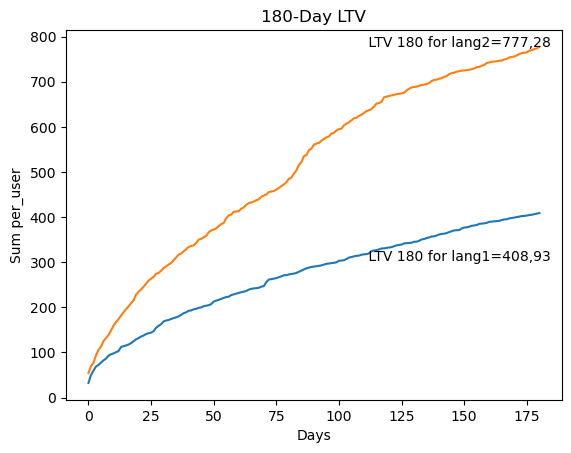

In [93]:
plt.plot(ll1)
plt.plot(ll2)
plt.title("180-Day LTV")
plt.xlabel("Days")
plt.ylabel("Sum per_user")
plt.text(s=(" LTV 180 for lang1=408,93".format(ll1.loc[180])),
       x=110, y=ll1.loc[100] + .05);
plt.text(s=(" LTV 180 for lang2=777,28".format(ll2.loc[60])),
       x=110, y=ll2.loc[180] + .05);


In [94]:
lang_ltv1['pay_rub'].sum()/l1['username'].nunique()


408.930500417605

In [95]:
lang_ltv2['pay_rub'].sum()/l22

777.2819809343168

In [96]:
lang_ltv1['pay_rub'].sum()

1391590.4929211098

In [97]:
lang_ltv2['pay_rub'].sum()

2565807.81906418

In [98]:
l1['username'].nunique()

3403

In [99]:
l22

3301

# TASK 5

In [100]:
boost=(lang_ltv2['pay_rub'].sum()/l22)/(lang_ltv1['pay_rub'].sum()/l1['username'].nunique())
boost

1.9007679303464688

# TASK 4

In [101]:
merged_data1 = pd.merge(lang, roubles, on='username', how='inner')

In [102]:
total_payments_by_lang = merged_data1.groupby('lang')['pay_rub'].sum()
total_payments_by_lang

lang
lang1    2.298254e+06
lang2    5.063668e+06
Name: pay_rub, dtype: float64

# TASK 6

In [103]:
country3=installs.loc[(installs['country']=='country3')]
country3['day_reg'].max()

Timestamp('2023-06-24 00:00:00')

In [104]:
country3_f=country3.loc[(country3['day_reg']<='2022-12-27')]

In [105]:
country3_f['username'].nunique()

2844

In [106]:
ltv3_180= country3_f.merge(roubles, on='username', how='inner')
ltv3_180.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3791 entries, 0 to 3790
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   username  3791 non-null   object        
 1   lang      3791 non-null   object        
 2   country   3791 non-null   object        
 3   day_reg   3791 non-null   datetime64[ns]
 4   pay_dt    3791 non-null   object        
 5   pay_rub   3791 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 207.3+ KB


In [107]:
ltv3_180['pay_dt'] = pd.to_datetime(ltv3_180['pay_dt'])

In [108]:
ltv3_180['diff_days'] = (ltv3_180['pay_dt'] - ltv3_180['day_reg']).dt.days
ltv3_180

,username,lang,country,day_reg,pay_dt,pay_rub,diff_days
0,burnselizabeth,lang1,country3,2022-11-22,2022-12-01,30.0,9
1,burnselizabeth,lang1,country3,2022-11-22,2022-12-05,97.0,13
2,burnselizabeth,lang1,country3,2022-11-22,2022-12-08,25.0,16
3,burnselizabeth,lang1,country3,2022-11-22,2023-01-06,97.0,45
4,burnselizabeth,lang1,country3,2022-11-22,2023-01-27,200.0,66
...,...,...,...,...,...,...,...
3786,campbelljulia,lang1,country3,2022-07-22,2023-06-01,530.0,314
3787,ronnie36,lang1,country3,2022-09-25,2022-09-26,1000.0,1
3788,gonzalesmichelle,lang1,country3,2022-06-16,2022-06-16,1000.0,0
3789,smithjeremy,lang1,country3,2022-07-29,2022-07-29,250.0,0


In [109]:
ltv3_180 = ltv3_180.loc[(ltv3_180['diff_days']<=180)]
ltv3_180

,username,lang,country,day_reg,pay_dt,pay_rub,diff_days
0,burnselizabeth,lang1,country3,2022-11-22,2022-12-01,30.0,9
1,burnselizabeth,lang1,country3,2022-11-22,2022-12-05,97.0,13
2,burnselizabeth,lang1,country3,2022-11-22,2022-12-08,25.0,16
3,burnselizabeth,lang1,country3,2022-11-22,2023-01-06,97.0,45
4,burnselizabeth,lang1,country3,2022-11-22,2023-01-27,200.0,66
...,...,...,...,...,...,...,...
3785,spencerpaul,lang1,country3,2022-09-15,2022-10-21,550.0,36
3787,ronnie36,lang1,country3,2022-09-25,2022-09-26,1000.0,1
3788,gonzalesmichelle,lang1,country3,2022-06-16,2022-06-16,1000.0,0
3789,smithjeremy,lang1,country3,2022-07-29,2022-07-29,250.0,0


In [110]:
ltv3_180.groupby(['diff_days']).count()

,username,lang,country,day_reg,pay_dt,pay_rub
diff_days,,,,,,
0,96,96,96,96,96,96
1,74,74,74,74,74,74
2,47,47,47,47,47,47
3,55,55,55,55,55,55
4,30,30,30,30,30,30
...,...,...,...,...,...,...
176,8,8,8,8,8,8
177,5,5,5,5,5,5
178,7,7,7,7,7,7


# TASK 6 ОТВЕТ

In [111]:
base_LTV= ltv3_180['pay_rub'].sum()/country3_f['username'].nunique()
base_LTV

378.1580344585091

# TASK 7

In [112]:
boost=1.9

In [113]:
assumption_ltv=round(base_LTV*boost,2)
assumption_ltv

718.5

In [114]:
estimated_costs=2400000

In [115]:
necessary_users= round(estimated_costs/assumption_ltv)
necessary_users

3340

# ДОПОЛНИТЕЛЬНОЕ ЗАДАНИЕ

In [116]:
data=merged_data_filtered

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6363 entries, 0 to 8848
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   username   6363 non-null   object        
 1   lang       6363 non-null   object        
 2   country    6363 non-null   object        
 3   day_reg    6363 non-null   datetime64[ns]
 4   pay_dt     6363 non-null   datetime64[ns]
 5   pay_rub    6363 non-null   float64       
 6   days_diff  6363 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 397.7+ KB


In [118]:
data

,username,lang,country,day_reg,pay_dt,pay_rub,days_diff
0,richarddavid,lang1,country2,2022-03-26,2022-03-26,168.106481,0
1,richarddavid,lang1,country2,2022-03-26,2022-03-27,167.762099,1
2,richarddavid,lang1,country2,2022-03-26,2022-03-27,15.516344,1
15,erica34,lang1,country2,2022-06-11,2022-06-29,627.544999,18
16,erica34,lang1,country2,2022-06-11,2022-06-29,125.506881,18
...,...,...,...,...,...,...,...
8843,belldakota,lang1,country2,2022-05-10,2022-05-11,589.888901,1
8844,belldakota,lang1,country2,2022-05-10,2022-05-11,2949.444503,1
8845,belldakota,lang1,country2,2022-05-10,2022-05-11,589.888901,1
8846,jesse55,lang2,country2,2022-11-26,2023-02-08,122.913243,74


In [119]:
data.drop(['country', 'day_reg', 'pay_dt'], axis= 1 , inplace= True ) 

C:\Users\Professional\AppData\Local\Temp\ipykernel_4696\2712598024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['country', 'day_reg', 'pay_dt'], axis= 1 , inplace= True )


In [120]:
data

,username,lang,pay_rub,days_diff
0,richarddavid,lang1,168.106481,0
1,richarddavid,lang1,167.762099,1
2,richarddavid,lang1,15.516344,1
15,erica34,lang1,627.544999,18
16,erica34,lang1,125.506881,18
...,...,...,...,...
8843,belldakota,lang1,589.888901,1
8844,belldakota,lang1,2949.444503,1
8845,belldakota,lang1,589.888901,1
8846,jesse55,lang2,122.913243,74


In [121]:
data = data.groupby(['lang', 'username'])['pay_rub'].sum().reset_index(name='ltv180')

In [122]:
data

,lang,username,ltv180
0,lang1,aaronbishop,34738.442870
1,lang1,acevedoshawn,262.011896
2,lang1,adamgibson,4897.878183
3,lang1,afrancis,70.721026
4,lang1,aguirresherry,325.520423
...,...,...,...
1352,lang2,zhammond,302.028543
1353,lang2,zimmermanjulie,571.739795
1354,lang2,zstewart,875.208355
1355,lang2,ztyler,102.569230


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

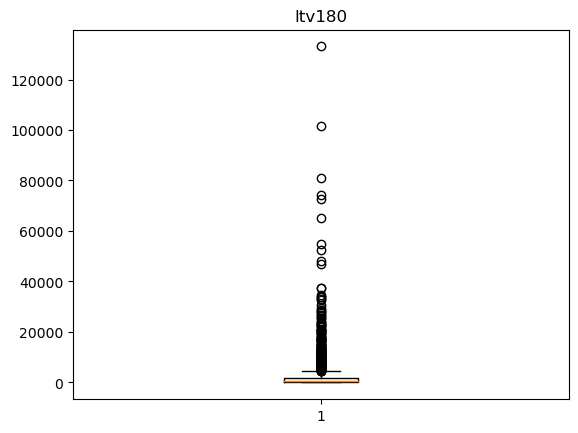

In [123]:
plt.boxplot(data['ltv180'])
plt.title('ltv180')
plt.show()

In [124]:
q3, q1 = np.percentile(data['ltv180'], [75, 25])
iqr = q3 - q1

<IPython.core.display.Javascript object>

In [125]:
#Находим квартили
q1 = np.percentile(data['ltv180'], 25)  # Вычисление 25-процентного квантиля
q3 = np.percentile(data['ltv180'], 75)  # Вычисление 75-процентного квантиля
iqr=q3-q1
# Определяем границы для очистки от выбросов
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [126]:
data1 = data[(data['ltv180'] >= lower_bound) & (data['ltv180'] <= upper_bound)]
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1160 entries, 1 to 1355
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lang      1160 non-null   object 
 1   username  1160 non-null   object 
 2   ltv180    1160 non-null   float64
dtypes: float64(1), object(2)
memory usage: 36.2+ KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

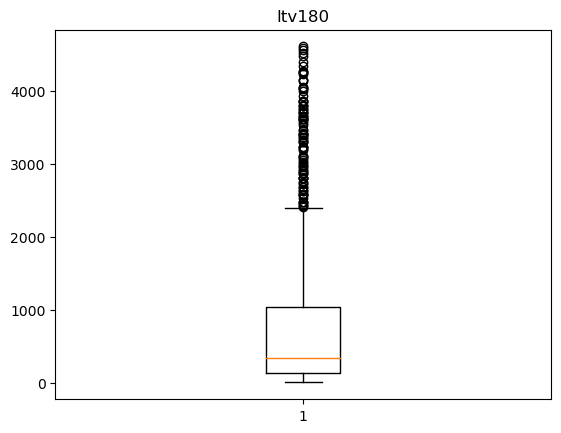

In [127]:
# строим новый боксплот
plt.boxplot(data1['ltv180'])
plt.title('ltv180')
plt.show()

In [128]:
# делим датасет на 2 по языкам
bootstrap_lang1 = data1[data1 ['lang'] == 'lang1']
bootstrap_lang2 = data1 [data1['lang'] == 'lang2']
print(bootstrap_lang1)
print(bootstrap_lang1)

      lang       username      ltv180
1    lang1   acevedoshawn  262.011896
3    lang1       afrancis   70.721026
4    lang1  aguirresherry  325.520423
5    lang1    aimeepalmer   21.859098
6    lang1       ajimenez   75.755670
..     ...            ...         ...
684  lang1        zcarter  213.444530
685  lang1        zjoseph  240.363824
687  lang1   zoehenderson   68.749654
688  lang1       zroberts  874.866808
689  lang1     zwhitehead   17.695117

[612 rows x 3 columns]
      lang       username      ltv180
1    lang1   acevedoshawn  262.011896
3    lang1       afrancis   70.721026
4    lang1  aguirresherry  325.520423
5    lang1    aimeepalmer   21.859098
6    lang1       ajimenez   75.755670
..     ...            ...         ...
684  lang1        zcarter  213.444530
685  lang1        zjoseph  240.363824
687  lang1   zoehenderson   68.749654
688  lang1       zroberts  874.866808
689  lang1     zwhitehead   17.695117

[612 rows x 3 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

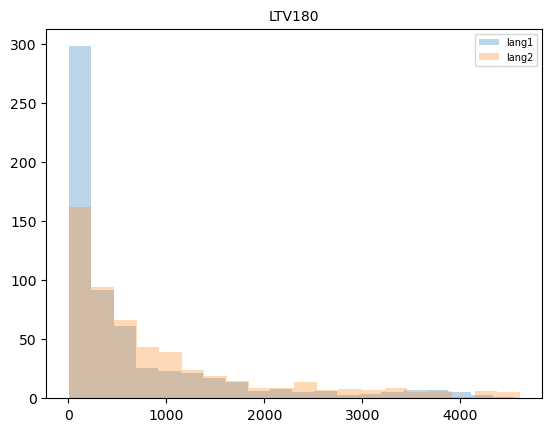

In [129]:
# строим гистограмму плотности распределения значений ltv180
plt.subplot()
plt.hist(bootstrap_lang1['ltv180'], bins = 20, alpha=0.3, label='lang1')
plt.hist(bootstrap_lang2['ltv180'], bins = 20, alpha=0.3, label='lang2')
plt.title('LTV180', fontsize=10)
plt.legend(fontsize=7)
plt.show()

In [130]:
# создаем датасет из выборочных средних
res = []
for i in range(1000):
    ddf = data1.sample(frac = 1, replace = True)
    res.append(ddf.groupby('lang')['ltv180'].mean())
new_df = pd.DataFrame(res)
new_df

lang,lang1,lang2
ltv180,631.903559,963.978707
ltv180,614.884127,881.060398
ltv180,659.260528,879.380983
ltv180,650.868808,950.009131
ltv180,657.008049,940.732576
...,...,...
ltv180,675.807650,983.717917
ltv180,662.523807,957.481032
ltv180,646.168663,942.293676
ltv180,688.579500,890.326061


In [131]:
# вычисляем среднее и среднеквадратичное отклонение для каждой группы в новом датасете
lang1_mean = new_df.lang1.mean()
lang2_mean = new_df.lang2.mean()
lang1_std = new_df.lang1.std(ddof=1)
lang2_std = new_df.lang2.std(ddof=1)

# вычисляем 95% доверительный интервал для каждой группы в новом датасете
import scipy.stats as st
x_lang1, y_lang1 = st.norm.interval(0.95, loc=lang1_mean, scale=lang1_std)
x_lang2, y_lang2 = st.norm.interval(0.95, loc=lang2_mean, scale=lang2_std)
print(x_lang1, y_lang1)

581.040742321289 719.9131563323944


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

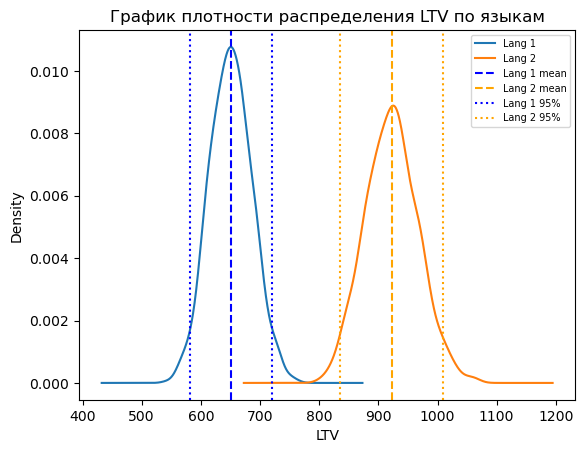

In [155]:
# строим график распределения средних, на котором отображены обе группы, их средние и доверительные интервалы
new_df['lang1'].plot.kde(label='Lang 1')
new_df['lang2'].plot.kde(label='Lang 2')

plt.axvline(lang1_mean, color='blue', linestyle='--', label='Lang 1 mean')
plt.axvline(lang2_mean, color='orange', linestyle='--', label='Lang 2 mean')
plt.axvline(x_lang1, color='blue', linestyle=':', label='Lang 1 95%')
plt.axvline(y_lang1, color='blue', linestyle=':', label='')
plt.axvline(x_lang2, color='orange', linestyle=':', label='Lang 2 95%')
plt.axvline(y_lang2, color='orange', linestyle=':', label='')
plt.legend(fontsize=7)
plt.title('График плотности распределения LTV по языкам')
plt.ylabel('Density')
plt.xlabel('LTV')
plt.show()